# Introduction to data Science. Exercise 1

## Bussiness Understanding

* Background: 
    Data scientist working for a company that provides car fleet maintenance services
* Bussiness objective: 
    How can we add value to the company by analyzing data from historic gasoline prices in Germany?

## Understanding the Data

In this Part I'm going to focus on loading the Data from both stations and prices samples. Also exploring the data and 
checking the quality of it.


In [1]:
import pandas as pd
import numpy as np
import folium as fol
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import unittest
import re
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_st = pd.read_csv('example_sprit_cut_station.csv', sep=";")
data_pr = pd.read_csv('example_sprit_cut_prices.csv', sep=";")

In [3]:
data_pr.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [4]:
data_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [5]:
data_pr.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


* We can observe negative min value, we would need later to remove these rows as the information is not valid
* Max values for E5 and E10 are out of "normal" range. To drop
* CHANGED column doesn't provide info to dop. DATE_CHANGED column gives us detailed information about the change.

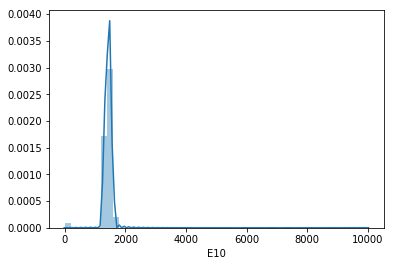

In [6]:
sns.distplot(data_pr['E10'])

* we can delimit the ranges of the prices, after visualazing like in the above graphic something between 1000 and 2000

In [7]:
data_st.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [8]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [9]:
data_st.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


* There are some missing information in BRAND, this can be filled with Unknown value
* VERSION, VERSION_TIME,PUBLIC_HOLIDAY_IDENTIFIER does not provide with meaningfull info for this exercise. To Drop
* Almost 20% of HOUSE_NUMBER data is missing, In this case is better to drop this column too
* LAT and LNG can be used to locate the station, so we can drop STREET, PLACE, POSTCODE

## Data preparation

### Clean the data

I'm dropping the columns containing non-important info for the exercise,also data cleaning is necessary 
and merging data for later analysis.

In [10]:
data_st.drop_duplicates(inplace=True)
data_pr.drop_duplicates(inplace=True)

We can Merge both data and continue cleaning from there after dropping duplicate data

In [11]:
data = pd.merge(data_pr,data_st,left_on='STID',right_on= 'ID',how='inner')
data.drop(columns=['ID'], inplace= True)
data.shape

(1094763, 17)

In [12]:
to_drop_st = ['VERSION','VERSION_TIME','HOUSE_NUMBER','PUBLIC_HOLIDAY_IDENTIFIER',
              'CHANGED', 'STREET', 'POST_CODE', 'PLACE']
data.drop(to_drop_st,inplace=True,axis=1)

In [13]:
data.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,NAME,BRAND,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,Esso Tankstelle,ESSO,49.633409,8.273847


Drop values that look too wide from the mean, which would mean erroneous values. Also convert prices to Euro unit.

In [14]:
data.drop(data[(data.E5>2000)|(data.E5<1000)].index,inplace=True,axis=0)
data.drop(data[(data.E10>1800)|(data.E10<1000)].index,inplace=True,axis=0)
data.drop(data[(data.DIESEL>1800)|(data.DIESEL<800)].index,inplace=True,axis=0)

data['E10'] = data['E10'].apply(lambda x:  x/1000)
data['E5'] = data['E5'].apply(lambda x:  x/1000)
data['DIESEL'] = data['DIESEL'].apply(lambda x:  x/1000)

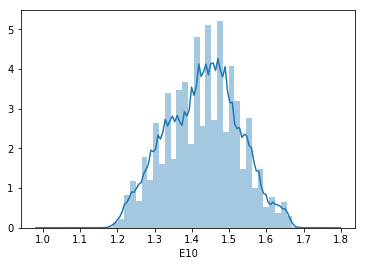

In [15]:
sns.distplot(data['E10'])

Drop rows with empty Brand Values and 'not active'

In [16]:
data.dropna(subset=['BRAND'], inplace=True)
data.drop(data[(data.NAME=='nicht mehr aktiv')].index, inplace=True,axis=0)

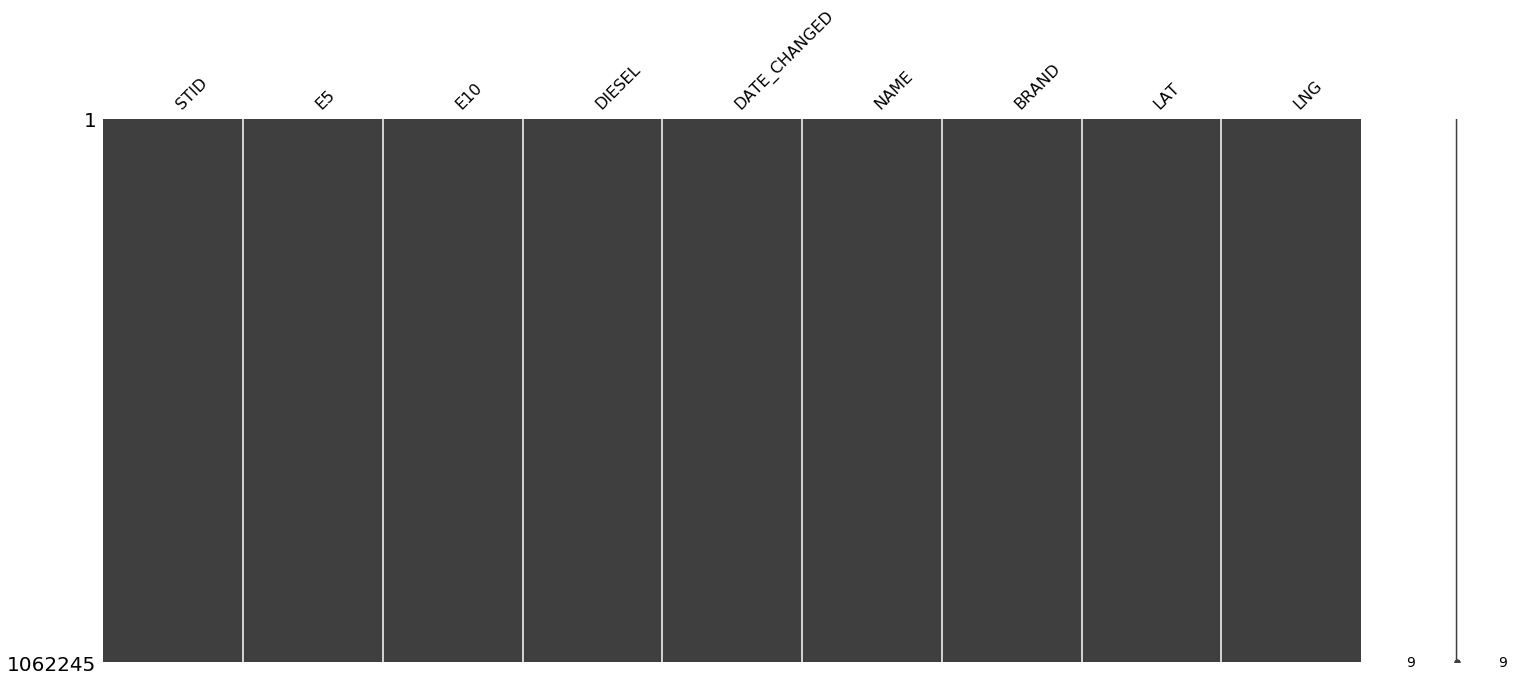

In [17]:
ms.matrix(data)

Grouping same brands with slightly different name

In [18]:
#Function to match a reg expr. and replace the whole string with new value 
def ReplaceMatchingValue(prev,new,column):
    matchVal = re.compile("^"+prev+".*",re.I)
    column = column.apply(lambda x: re.sub(matchVal,new,x,re.IGNORECASE))
    return column

data['BRAND'] = ReplaceMatchingValue("auto zotz","AUTO ZOTZ",data['BRAND'])
data['BRAND'] = ReplaceMatchingValue("supermarkt","Supermarkt Tankstelle",data['BRAND'])
data['BRAND'] = ReplaceMatchingValue("frei","Frei Tankstelle",data['BRAND'])
data['BRAND'] = ReplaceMatchingValue("total","Total",data['BRAND'])
data['BRAND'] = ReplaceMatchingValue("sb","SB",data['BRAND'])
data['BRAND'].value_counts()


Shell                          190298
ARAL                           181215
ESSO                           119348
AVIA                           114336
Total                           79206
JET                             69325
Supermarkt Tankstelle           39254
Agip                            35645
BFT                             33887
OMV                             28661
OIL!                            21107
SB                              17281
HEM                             14286
bft                             12903
T                               10992
Frei Tankstelle                 10546
ED                              10069
Frühmesser GmbH                  7194
Tankcenter                       6634
Preis                            6549
\N                               5994
ZG Raiffeisen Energie            5721
E Center                         3739
TAMOIL                           3132
Markant                          3127
mtb                              2963
AUTO ZOTZ   

In [19]:
def create_date_columns(frame,date_column):
    frame['YEAR']    = date_column.dt.year
    frame['DAY']     = date_column.dt.dayofyear
    frame['WEEK']    = date_column.dt.weekofyear
    frame['MONTH']   = date_column.dt.month
    frame['HOUR']    = date_column.dt.hour
    frame['WEEKDAY'] = date_column.dt.dayofweek
    return frame

In [20]:
data['DATE_CHANGED'] =pd.to_datetime(data.DATE_CHANGED)
data = create_date_columns(data,data.DATE_CHANGED)
data.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,NAME,BRAND,LAT,LNG,YEAR,DAY,WEEK,MONTH,HOUR,WEEKDAY
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.589,1.549,1.389,2014-10-02 05:22:01,Esso Tankstelle,ESSO,49.633409,8.273847,2014,275,40,10,5,3
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.369,2014-10-02 05:26:01,Esso Tankstelle,ESSO,49.633409,8.273847,2014,275,40,10,5,3
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.359,2014-10-02 09:06:01,Esso Tankstelle,ESSO,49.633409,8.273847,2014,275,40,10,9,3
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.539,1.499,1.339,2014-10-03 12:14:01,Esso Tankstelle,ESSO,49.633409,8.273847,2014,276,40,10,12,4
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.529,1.489,1.329,2014-10-03 14:14:01,Esso Tankstelle,ESSO,49.633409,8.273847,2014,276,40,10,14,4


### Select  and Construct Data

## Analize Data

### 1. How many different stations exist in the data set and what is the existing history in days (bar chart)?

In [21]:
print("Number of stations: ",data['STID'].nunique())
print("Number of Brands: ",data['BRAND'].nunique())

Number of stations:  390
Number of Brands:  44


Number of Stations are to many to plot, instead I'm showing information about brands from 2015 because it's the most recent year, thus most recent data.

In [22]:
history = data[data['YEAR'] == 2015]

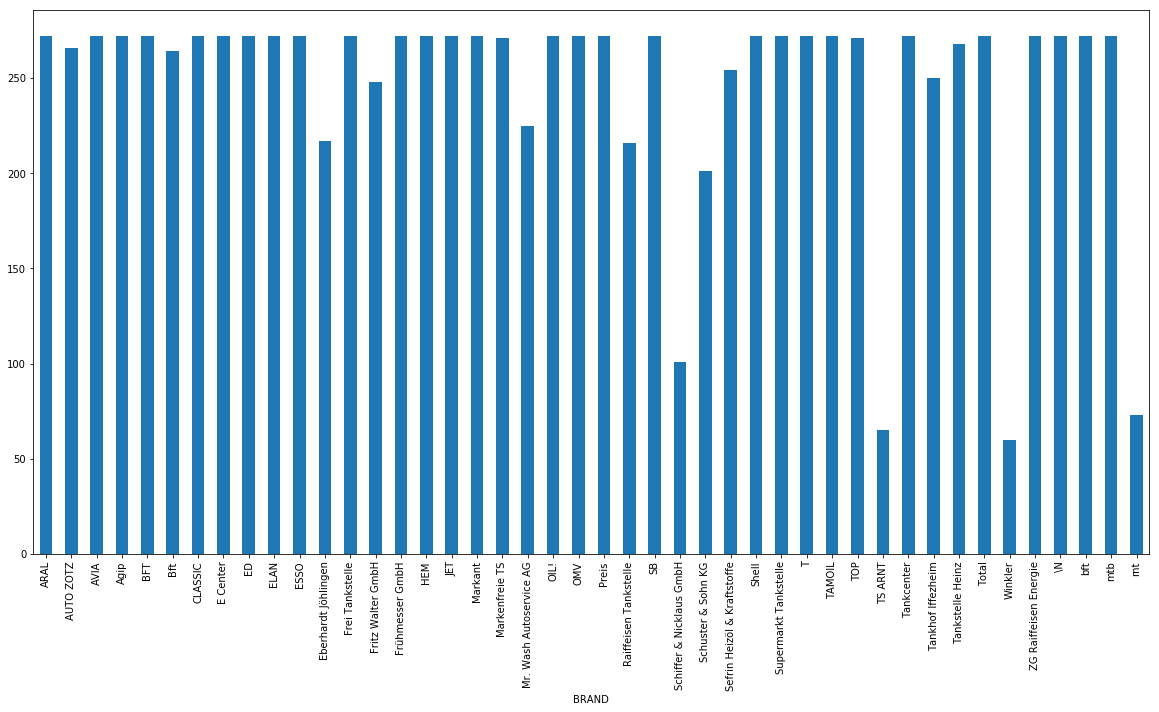

In [23]:
counts_by_brand = history.groupby('BRAND').nunique()
counts_by_brand['DAY'].plot(kind='bar',figsize=(20,10))

### 2. What is the min, mean, max price for each gasoline type and station weekly (time series graph)

Again I'll show the info only from 2015. I use pivot tables to store the mean, min, max values of the gasoline

In [24]:
def plot_triples(df,value1,value2,value3):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,8))
    df[value1].plot(legend=False,ax=axes[0],title=value1)
    df[value2].plot(legend=False,ax=axes[1],title=value2)
    df[value3].plot(legend=False,ax=axes[2],title=value3)

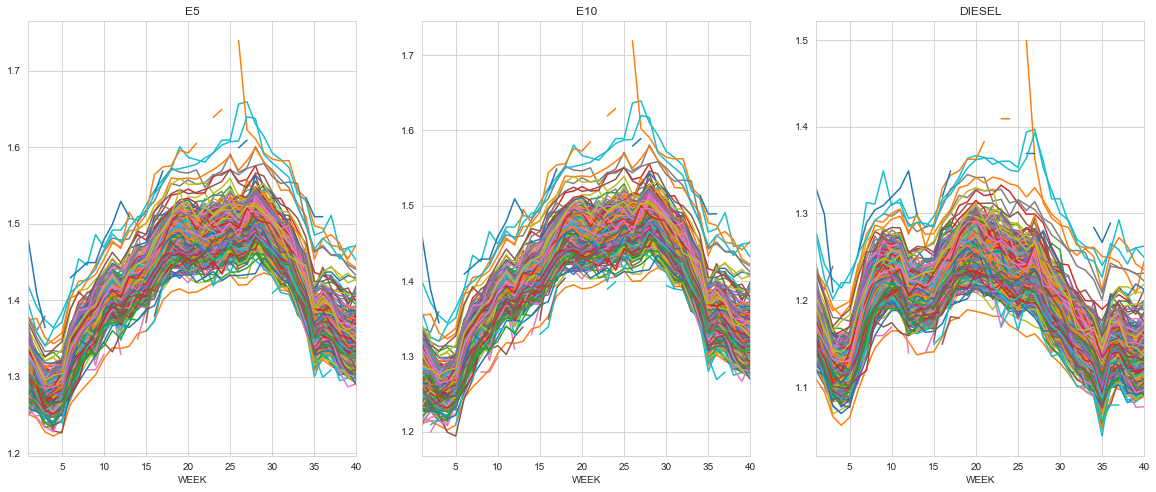

In [25]:
mean_type = pd.pivot_table(history,values=['E5','E10','DIESEL'],index=['WEEK','STID'],
                            aggfunc={'E5':np.mean,'E10':np.mean, 'DIESEL':np.mean})
# unstack STID to be able to graph them as reference of the stations
mean_type = mean_type.unstack(level=1)
plot_triples(mean_type,'E5','E10','DIESEL')

Comment: plotting min and max values do not show much difference. In regards of visualization, they do not add value, therefore is not shown here

### 3. What is cheapest station (in average) and why?

In [26]:
mean_general = pd.pivot_table(history,values=['E5','E10','DIESEL'],index='NAME',
                            aggfunc={'E5':np.mean,'E10':np.mean, 'DIESEL':np.mean})
mean_general.reset_index(0,inplace= True)

print("Cheapest DIESEL:\t",mean_general['DIESEL'].loc[mean_general['DIESEL'].idxmin()], "\t",
      mean_general['NAME'].loc[mean_general['DIESEL'].idxmin()])
print("Cheapest E5:\t\t",mean_general['E5'].loc[mean_general['E5'].idxmin()], "\t",
      mean_general['NAME'].loc[mean_general['E5'].idxmin()])
print("Cheapest E10:\t\t",mean_general['E10'].loc[mean_general['E10'].idxmin()], "\t",
      mean_general['NAME'].loc[mean_general['E10'].idxmin()])

Cheapest DIESEL:	 1.1206274509803915 	 SBK - Tankstelle
Cheapest E5:		 1.3445384615384615 	 rnt
Cheapest E10:		 1.3122307692307695 	 rnt


I took all available data base information and average it.

### 4. At which day of a weak is the price most likely the cheapest (week profile)

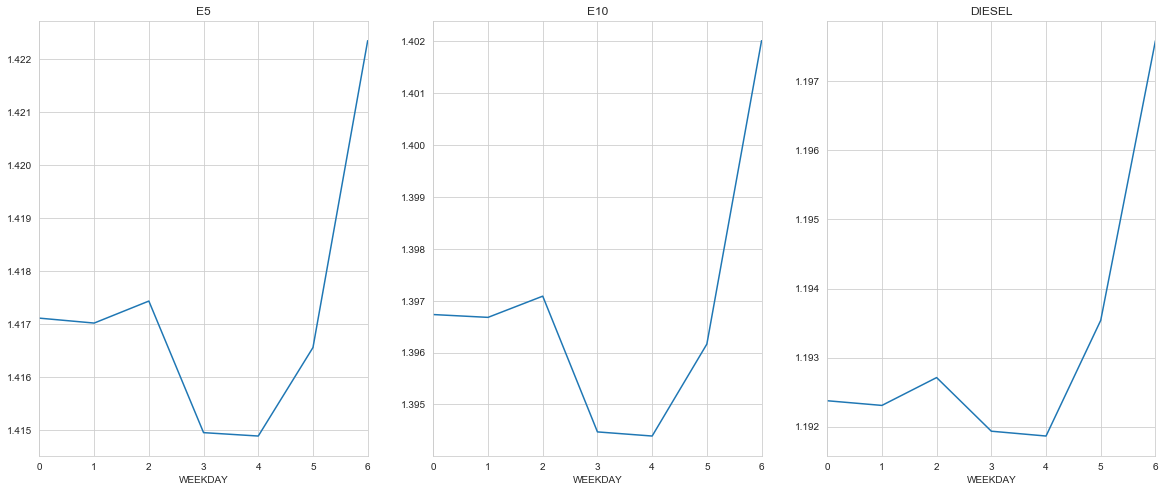

In [27]:
mean_weekday = pd.pivot_table(history,values=['E5','E10','DIESEL'],index=['WEEKDAY'],
                            aggfunc={'E5':np.mean,'E10':np.mean, 'DIESEL':np.mean})
# unstack STID to be able to graph them as reference of the stations
mean_weekday = mean_weekday.unstack(level=1)
plot_triples(mean_weekday,'E5','E10','DIESEL')

0 - Sun, 1 - Mon, 2 - Tues, 3 - Wed, 4 - Thur, 5 - Friday, 6 - Saturday.

It is clear to see that prices are cheaper on Wednesday and Thursday. As soon as weekend approaches, the price increments significantly specially con Saturday.

### 5. At which hour during a day is the price the cheapest in average (hour profile)

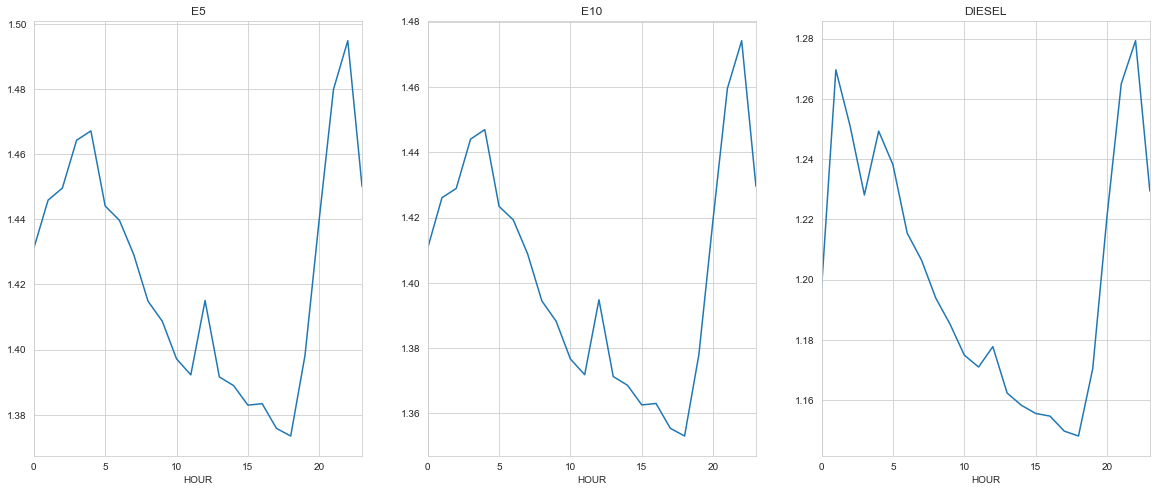

In [28]:
mean_hour = pd.pivot_table(history,values=['E5','E10','DIESEL'],index=['HOUR'],
                            aggfunc={'E5':np.mean,'E10':np.mean, 'DIESEL':np.mean})
# unstack STID to be able to graph them as reference of the stations
mean_hour = mean_hour.unstack(level=1)
plot_triples(mean_hour,'E5','E10','DIESEL')

Around 13 to 18 hours we can see prices are lower.

### 6. How many different station locations are present in the data (visualize via a map)

In [29]:
coord_st = history[['LAT','LNG','NAME']]
coord_st = pd.DataFrame.drop_duplicates(coord_st)

map_tmp = fol.Map(location=[49.81, 7.36], zoom_start=8)
for i in range(0,len(coord_st)):
    fol.Marker([coord_st.iloc[i][0], coord_st.iloc[i][1]]).add_to(map_tmp)
map_tmp

### 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasonline types

In [30]:
extract_data = history[['NAME','E10','E5','DIESEL']]
pivot_size =pd.pivot_table(extract_data,index=['NAME'],values = ['E10','E5','DIESEL'],aggfunc=[len])
pivot_size.reset_index(level=0, inplace=True)

print("Most data points DIESEL:\t",pivot_size['len']['DIESEL'].loc[pivot_size['len']['DIESEL'].idxmax()], "\t",
      pivot_size['NAME'].loc[pivot_size['len']['DIESEL'].idxmax()])

Most data points DIESEL:	 113399.0 	 Aral Tankstelle


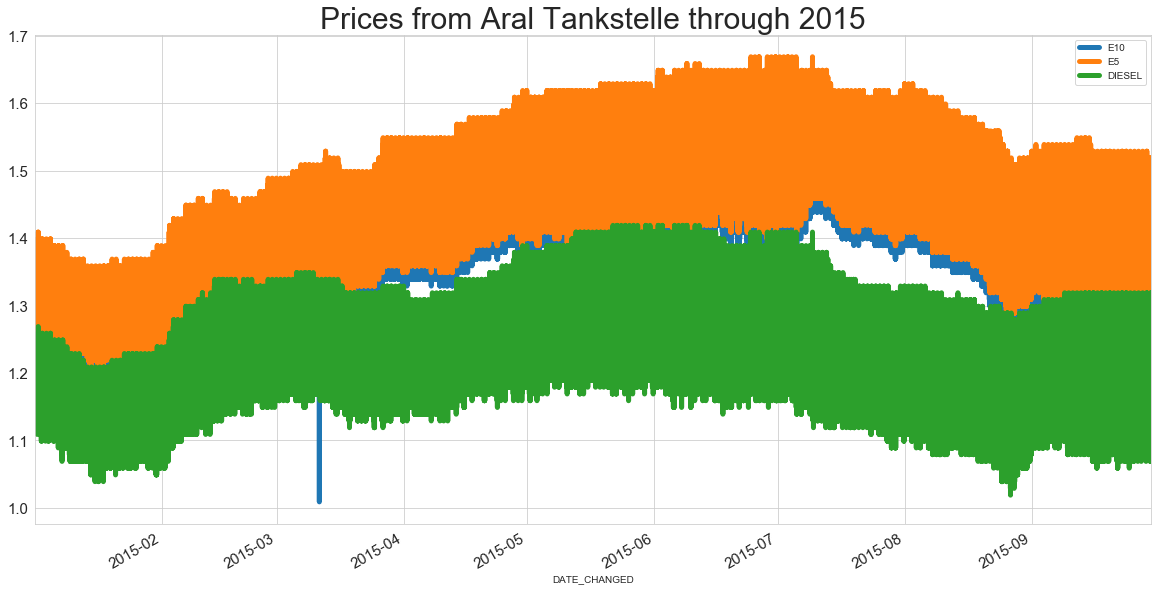

In [31]:
gas_st = history.loc[history['NAME'] == pivot_size['NAME'].loc[pivot_size['len']['DIESEL'].idxmax()]]

gas_st.plot(x ='DATE_CHANGED',y = ['E10','E5','DIESEL'],figsize=(20,10),fontsize=15,linestyle='-', linewidth=5)
plt.title('Prices from Aral Tankstelle through 2015',fontsize=30)
plt.legend(loc='upper right',fontsize = 10)
plt.show()

### 8. At which hour during a day do we have the most price changes

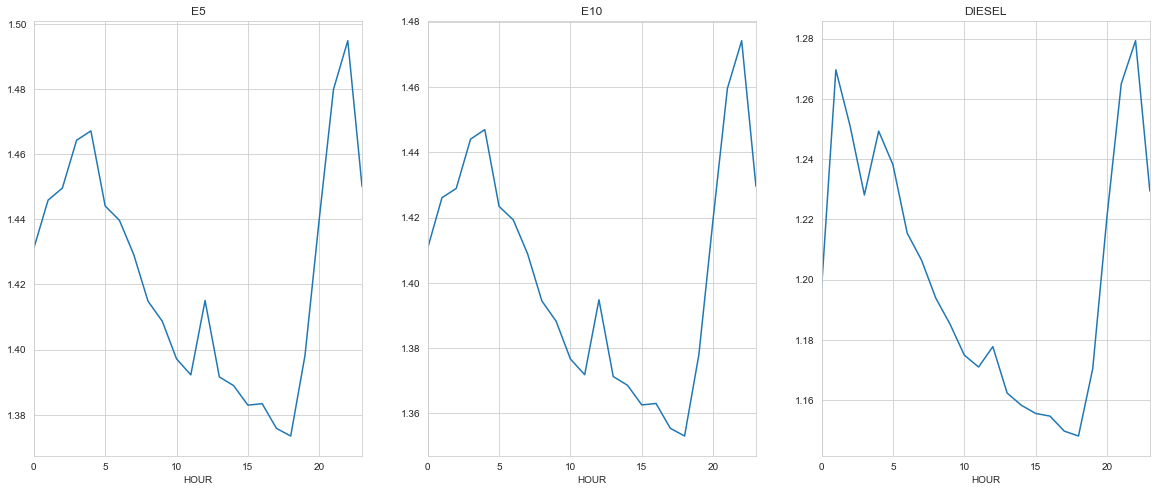

In [32]:
plot_triples(mean_hour,'E5','E10','DIESEL')

By looking again the graph from question 5, we can see that after reaching the lowest price of the day it rapidly increments until reaching its max price. We can say from 18 to 23 hrs the prices suffer more changes.

### 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

Get the 20 gas stations to work with

In [33]:
# get the 20 gas stations to work with
selected_st = data['NAME'].value_counts().head(20)
selected_st = selected_st.to_frame()
selected_st.reset_index(0,inplace= True)

col_list = list(selected_st)                        # get a list of the columns
col_list[0], col_list[1] = col_list[1], col_list[0] #  swap the elements
selected_st.columns = col_list                      # assign back, the order will now be swapped

Colect data of selected Stations and take only info where hour was 12:xx

In [34]:
# colect data of selected Stations and take only info where hour was 12:xx
selected_data = pd.DataFrame()
for index, row in selected_st.iterrows():
    selected_data = selected_data.append(data[data['NAME'].str.match(row["NAME"])])

selected_data = selected_data[(selected_data.HOUR == 12)]
selected_data.reset_index(0,inplace= True)
selected_data = selected_data[['NAME','E10','DIESEL','MONTH','HOUR']]
selected_data.head()

,NAME,E10,DIESEL,MONTH,HOUR
0,Aral Tankstelle,1.449,1.299,10,12
1,Aral Tankstelle,1.429,1.289,10,12
2,Aral Tankstelle,1.359,1.229,2,12
3,Aral Tankstelle,1.419,1.209,4,12
4,Aral Tankstelle,1.469,1.249,5,12


In [35]:
mean_sel_month = pd.pivot_table(selected_data,values=['E10','DIESEL'],index=['MONTH'],
                                aggfunc={'E10':np.mean, 'DIESEL':np.mean})
mean_sel_month

,DIESEL,E10
MONTH,,
1,1.113978,1.248805
2,1.170747,1.306687
3,1.191719,1.361621
4,1.203966,1.406769
5,1.229744,1.436518
6,1.248985,1.471407
7,1.225725,1.489002
8,1.191477,1.430775
9,1.198319,1.388253


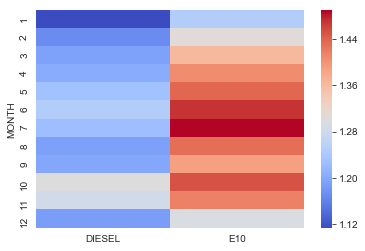

In [36]:
sns.heatmap(mean_sel_month,cmap='coolwarm')

### 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

Constraints of the business:
    * There are only one type of car E10
    * The company has an average of 100 cars with 30L capacity in the need to refuel everyday
    * Maintenance services are open 24/7 (for car rental companies)
    * Maintenance services operate only in rheinland pfalz and nearby
    * Cars need to move to different locations (covered by maintenance company) 

Bussiness potential:
* Cars should not move on Saturday for delivering the cars after repair, the maintenance service can be open only to receive cars to deliver the following days. By doing so, the company avoids the need to refuel on Saturday when the prices are the highest.
* Refueling should be done at 18:00 hours, this is the time when the gasoline prices are cheaper.
* Maintenance services should negotiate with the customer for more convinient price during Summer due to the high prices of fuel during that time


### UNIT TESTS

In [37]:
class TestNotebook(unittest.TestCase):

    def test_matching_columns(self):
        d1 = {'col1': ["matchGARBAGE", "other","MatchGarbaGE"]}
        df1 = pd.DataFrame(data=d1)
        d2 = {'col1': ["MATCH", "other","MATCH"]}
        df2 = pd.DataFrame(data=d2)
        res = pd.testing.assert_frame_equal(ReplaceMatchingValue("match","MATCH",df1['col1']).to_frame(), df2)
        self.assertIsNone(res, msg=None)
    
    def test_date_columns_creation(self):
        d1 = {'date': [ '2014-10-02 05:22:01.000000']}
        df1 = pd.DataFrame(data=d1)
        df1['date'] =pd.to_datetime(df1.date)
        d2 = {'YEAR': [2014],'MONTH': [10], 'DAY':[2]}
        df2 = pd.DataFrame(data=d2)
        
        df1 = create_date_columns(df1,df1.date)
        res = pd.testing.assert_series_equal(df1['YEAR'], df2['YEAR'])
        self.assertIsNone(res, msg=None)
        res = pd.testing.assert_series_equal(df1['MONTH'], df2['MONTH'])
        self.assertIsNone(res, msg=None)

unittest.main(argv=[''], verbosity=2, exit=False)

test_date_columns_creation (__main__.TestNotebook) ... ok
test_matching_columns (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.019s

OK
